In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer

In [58]:
df = pd.read_csv("/content/drive/MyDrive/Collab DataSets/Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [35]:
x = df.iloc[:,1:2].values.astype(float)
y = df.iloc[:,2:3].values.astype(float)

In [37]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [38]:
model = SVR(kernel = "rbf")
model.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

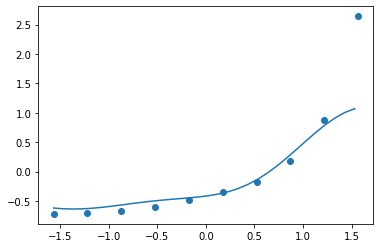

In [45]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape(len(x_grid), 1)
plt.scatter(x,y)
plt.plot(x_grid, model.predict(x_grid))


In [46]:
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x)

In [48]:
poly_model = LinearRegression()
poly_model.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
x_poly_grid = np.arange(min(x), max(x), 0.1)
x_poly_grid = x_poly_grid.reshape(len(x_poly_grid), 1)

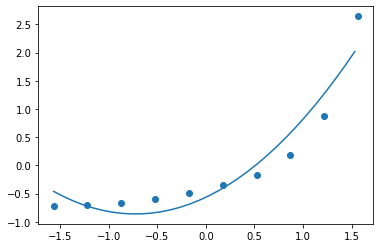

In [54]:
plt.scatter(x, y)
plt.plot(x_poly_grid, poly_model.predict(poly.fit_transform(x_poly_grid)))